<a href="https://colab.research.google.com/github/sanaa-sys/Market-Anomaly/blob/main/Market_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import drive



In [19]:
df = pd.read_csv('/content/FinancialMarketData.xlsx - EWS.csv')
df = df.dropna()
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()



,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
Y,1.000000,-0.011535,-0.090772,-0.083440,-0.074102,0.103227,-0.151197,-0.093201,-0.070141,0.598432,...,-0.209774,-0.169475,-0.156550,-0.193928,-0.253877,-0.279399,-0.043429,-0.148848,-0.188942,-0.149581
XAU BGNL,-0.011535,1.000000,0.114798,-0.315007,0.015316,-0.428891,-0.576191,-0.422084,0.515215,-0.075873,...,0.817990,0.891486,0.925465,0.625814,0.176177,0.036654,0.581667,0.339929,0.831756,0.829659
ECSURPUS,-0.090772,0.114798,1.000000,-0.102022,-0.139779,0.074835,-0.070422,-0.188233,-0.016245,-0.094127,...,0.115747,0.110335,0.073268,0.192180,0.014535,0.034829,-0.014098,-0.077750,0.102198,0.115145
BDIY,-0.083440,-0.315007,-0.102022,1.000000,0.596182,-0.441793,0.062822,0.756718,0.286396,-0.045367,...,-0.410941,-0.350372,-0.241704,-0.300277,-0.058349,0.103124,0.337489,0.606526,-0.240799,-0.033084
CRY,-0.074102,0.015316,-0.139779,0.596182,1.000000,-0.798564,-0.412364,0.793954,0.785614,-0.190060,...,-0.315491,-0.218547,-0.045101,-0.458623,-0.261605,-0.235202,0.641511,0.761661,-0.210901,-0.031605
DXY,0.103227,-0.428891,0.074835,-0.441793,-0.798564,1.000000,0.650429,-0.544966,-0.816378,0.115712,...,-0.074069,-0.201703,-0.386866,0.144988,0.300674,0.247446,-0.776353,-0.756141,-0.188670,-0.352379
JPY,-0.151197,-0.576191,-0.070422,0.062822,-0.412364,0.650429,1.000000,-0.008633,-0.608209,-0.134791,...,-0.113902,-0.225936,-0.330176,0.115772,0.392934,0.557078,-0.639573,-0.306819,-0.149469,-0.269353
GBP,-0.093201,-0.422084,-0.188233,0.756718,0.793954,-0.544966,-0.008633,1.000000,0.352787,-0.124496,...,-0.598572,-0.549016,-0.402361,-0.594595,-0.246342,-0.113736,0.224720,0.530964,-0.501925,-0.329350
Cl1,-0.070141,0.515215,-0.016245,0.286396,0.785614,-0.816378,-0.608209,0.352787,1.000000,-0.213999,...,0.196312,0.292426,0.438823,-0.029697,-0.062125,-0.160278,0.861036,0.759998,0.284056,0.430908
VIX,0.598432,-0.075873,-0.094127,-0.045367,-0.190060,0.115712,-0.134791,-0.124496,-0.213999,1.000000,...,-0.310635,-0.253247,-0.227376,-0.239029,-0.421996,-0.367709,-0.098962,-0.247953,-0.243126,-0.164591


In [20]:
df.describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.213321,987.463744,0.036153,2259.860486,245.247670,90.934982,106.605734,1.569661,60.708101,19.992169,...,232.109985,704.379545,259.052717,1606.997102,107.877138,784.846292,1903.216436,648.681377,693.156616,53.933159
std,0.409837,494.623740,0.349453,2017.811888,68.278066,11.379095,12.840754,0.212344,25.900813,8.642157,...,109.917628,309.951757,75.934451,698.481956,20.795973,200.076443,986.468254,299.096020,405.527014,24.738356
min,0.000000,256.680000,-0.974000,291.000000,106.293000,71.329000,75.940000,1.172000,10.010000,9.430000,...,80.797000,230.527000,121.331000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,0.000000,433.740000,-0.191000,990.000000,184.705550,81.240500,101.565000,1.418000,39.625000,13.640000,...,131.025000,434.661000,205.315500,1103.925000,90.605000,601.615000,1042.645000,463.195000,278.385000,28.565000
50%,0.000000,1137.800000,0.035000,1518.000000,234.560000,89.716000,108.720000,1.562000,57.400000,17.980000,...,213.205000,714.807000,264.770000,1324.430000,111.320000,786.830000,1860.960000,612.930000,691.530000,58.740000
75%,0.000000,1324.825000,0.260500,2685.500000,301.539500,97.404000,116.220000,1.677500,79.640000,23.625000,...,342.884500,939.824500,320.753000,1992.445000,126.470000,965.875000,2533.770000,793.620000,1014.750000,68.460000
max,1.000000,2006.910000,0.991000,11793.000000,467.570000,119.820000,134.630000,2.085000,140.970000,75.910000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


In [4]:
correlations  = numeric_df.corr()['Y'].sort_values(ascending=False)
print("Top feature correlations with target")
print(correlations)

Top feature correlations with target
Y            1.000000
VIX          0.598432
GTITL2YR     0.304528
GTITL10YR    0.297573
GTITL30YR    0.295000
EONIA        0.180311
GTDEM30Y     0.141537
GTDEM10Y     0.139933
GTJPY10YR    0.133660
GTDEM2Y      0.130607
GTJPY30YR    0.114555
GTJPY2YR     0.112314
DXY          0.103227
GTGBP20Y     0.100142
GTGBP30Y     0.099777
GTGBP2Y      0.035010
USGG30YR     0.019255
US0001M      0.015379
GT10        -0.004776
XAU BGNL    -0.011535
USGG3M      -0.025935
USGG2YR     -0.034909
MXBR        -0.043429
Cl1         -0.070141
CRY         -0.074102
BDIY        -0.083440
ECSURPUS    -0.090772
GBP         -0.093201
LUMSTRUU    -0.104897
LMBITR      -0.143607
MXRU        -0.148848
MXCN        -0.149581
JPY         -0.151197
LUACTRUU    -0.153544
LF94TRUU    -0.156550
EMUSTRUU    -0.169475
MXIN        -0.188942
LF98TRUU    -0.189661
MXUS        -0.193928
LG30TRUU    -0.197232
LP01TREU    -0.209774
MXEU        -0.253877
MXJP        -0.279399
Name: Y, dtype: f

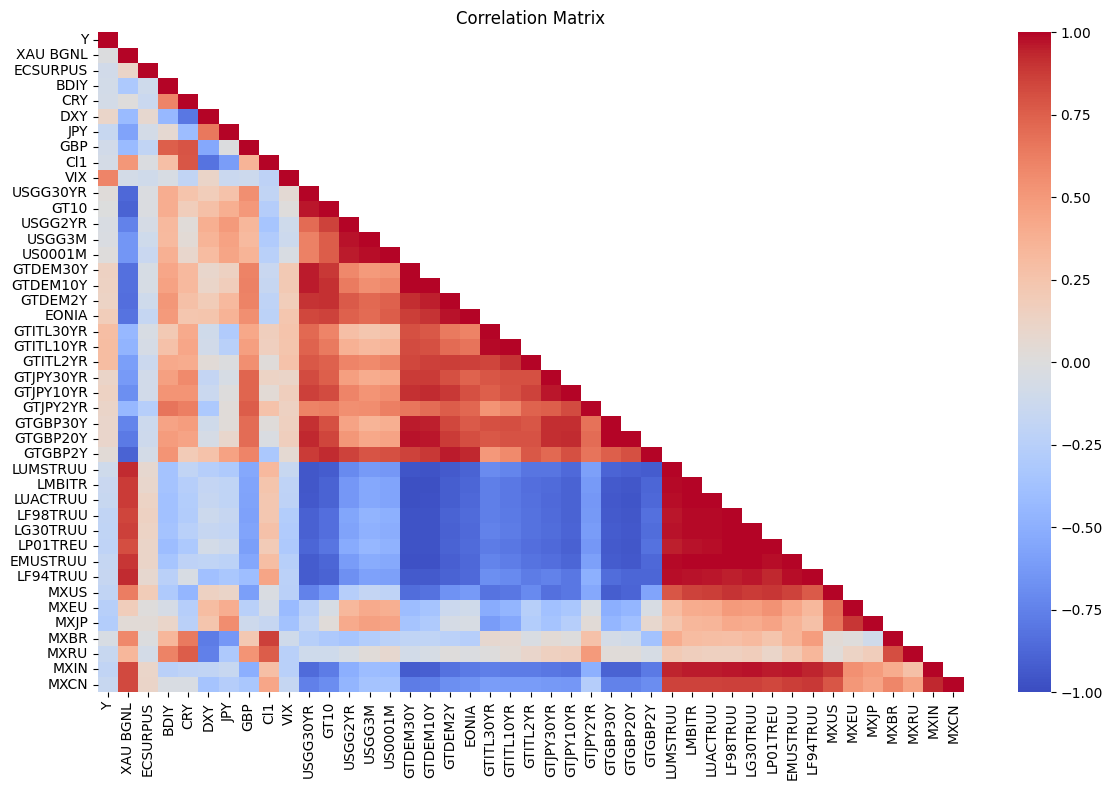

In [23]:
corr_matrix = numeric_df.corr()
upper_triangle = np.triu(corr_matrix)
mask = np.triu(np.ones_like(corr_matrix), k=1)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, mask=mask, cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

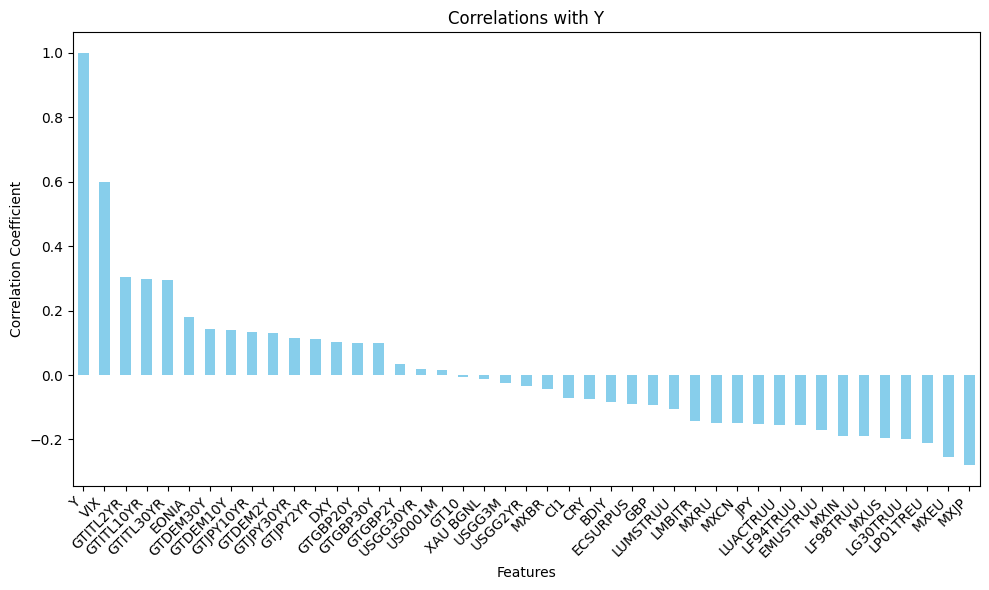

In [24]:
correlations = numeric_df.corr()['Y'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color='skyblue')
plt.title('Correlations with Y')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

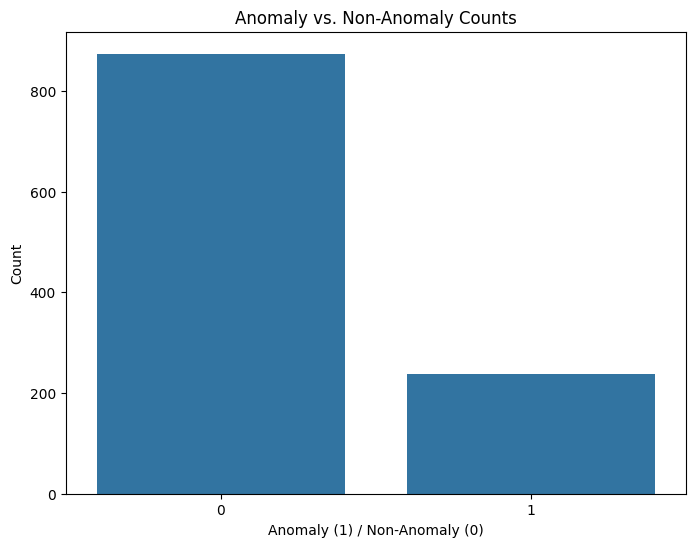

In [21]:

anomaly_counts = df['Y'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=anomaly_counts.index, y=anomaly_counts.values)
plt.title('Anomaly vs. Non-Anomaly Counts')
plt.xlabel('Anomaly (1) / Non-Anomaly (0)')
plt.ylabel('Count')
plt.show()

<ipython-input-6-091382e04fdc>:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels = ['Y=0','Y=1'])
<ipython-input-6-091382e04fdc>:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels = ['Y=0','Y=1'])
<ipython-input-6-091382e04fdc>:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels = ['Y=0','Y=1'])
<ipython-input-6-091382e04fdc>:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels = ['Y=0','Y=1

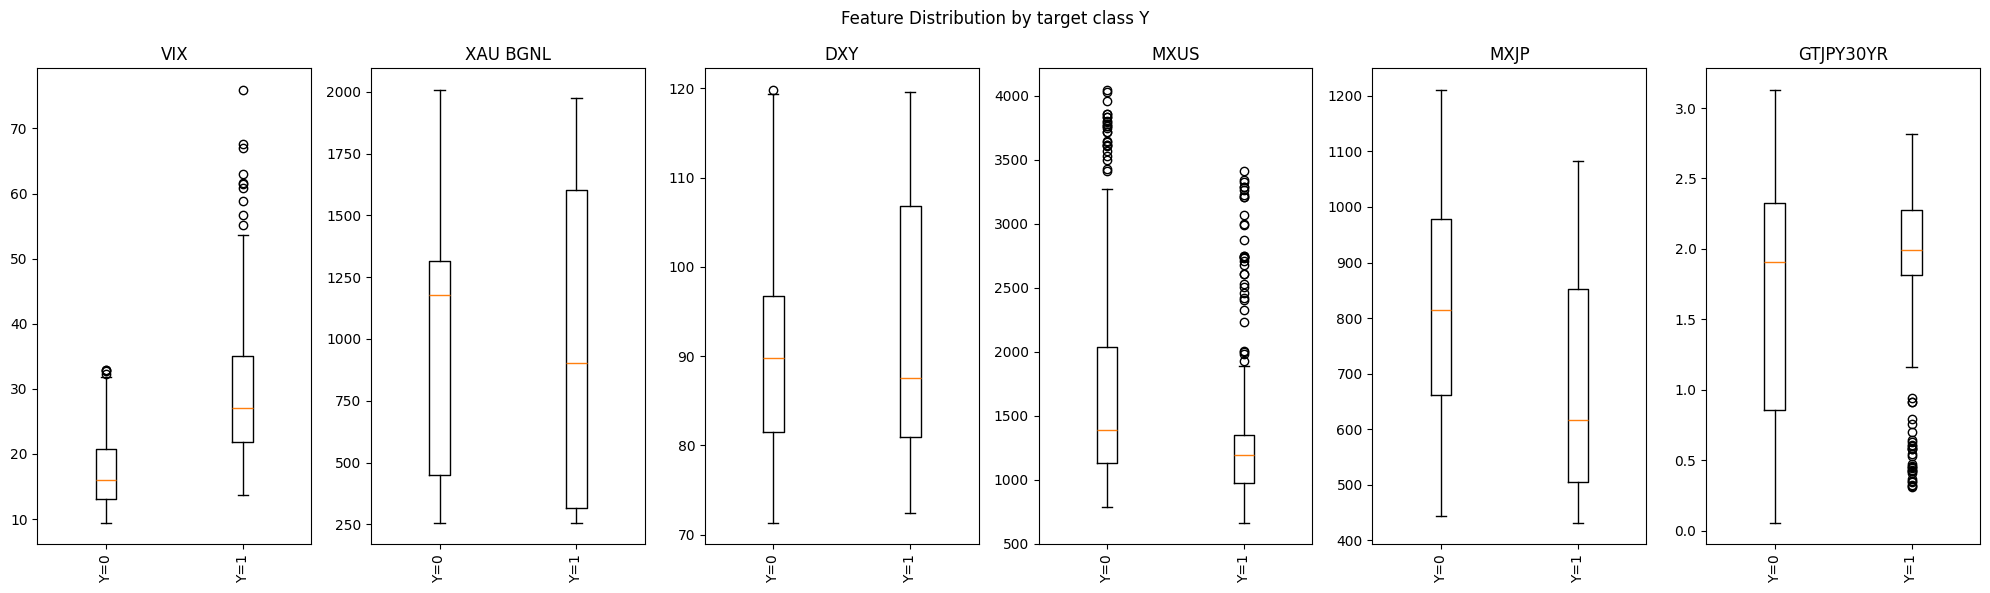

In [6]:
cols_to_plot = ["VIX" , "XAU BGNL", "DXY", "MXUS", "MXJP", "GTJPY30YR"]
fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 6))
fig.suptitle("Feature Distribution by target class Y")
for i,col in enumerate(cols_to_plot):
  data = [df[df['Y'] == 0][col], df[df['Y'] == 1][col]]
  axes[i].boxplot(data, labels = ['Y=0','Y=1'])
  axes[i].set_title(col)
  axes[i].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

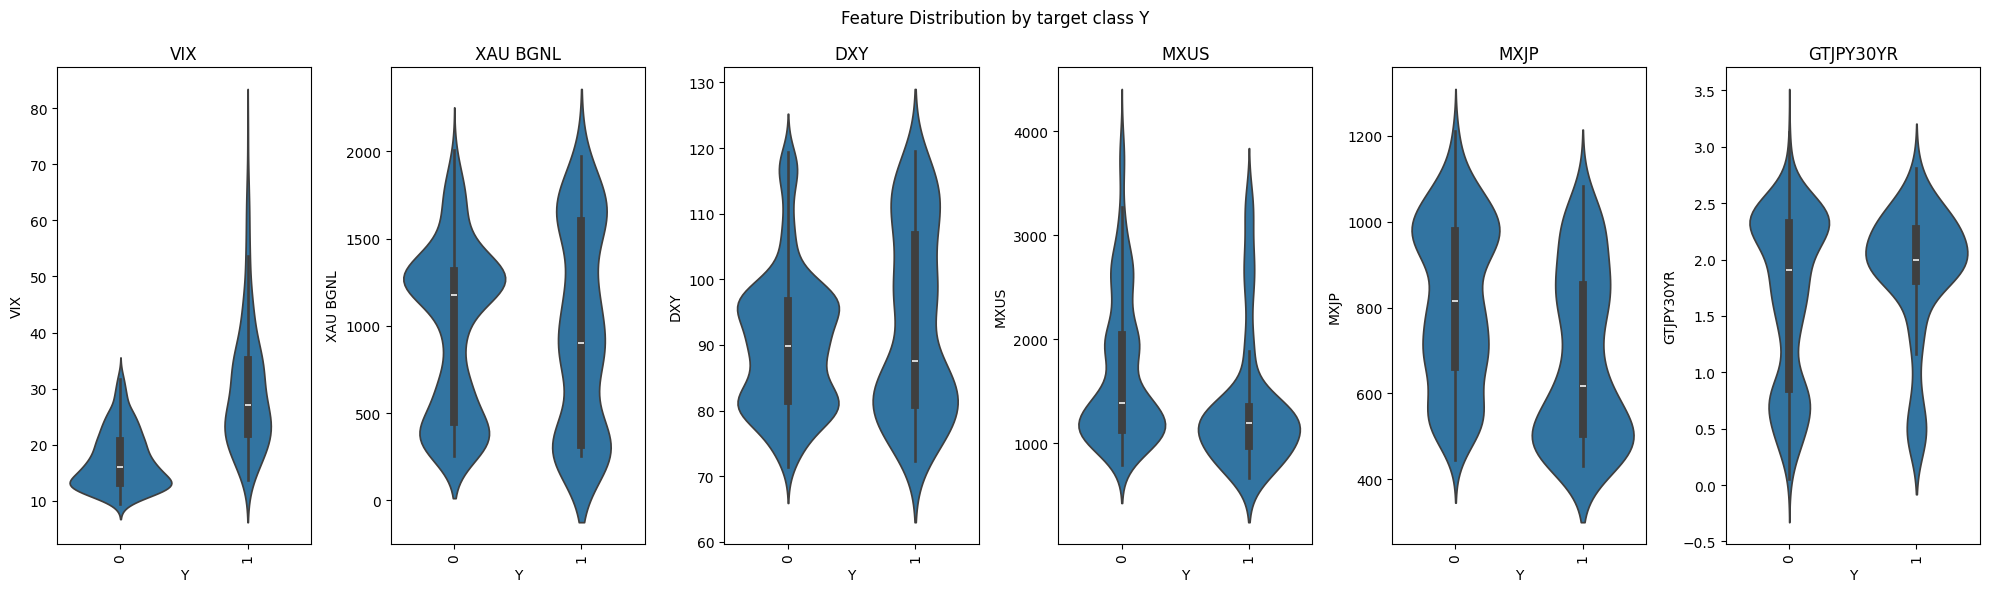

In [8]:
fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 6))
fig.suptitle("Feature Distribution by target class Y")
for i,col in enumerate(cols_to_plot):
  # Instead of boxplot, use violinplot:
  sns.violinplot(x='Y', y=col, data=df, ax=axes[i],inner = 'box')
  axes[i].set_title(col)
  axes[i].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

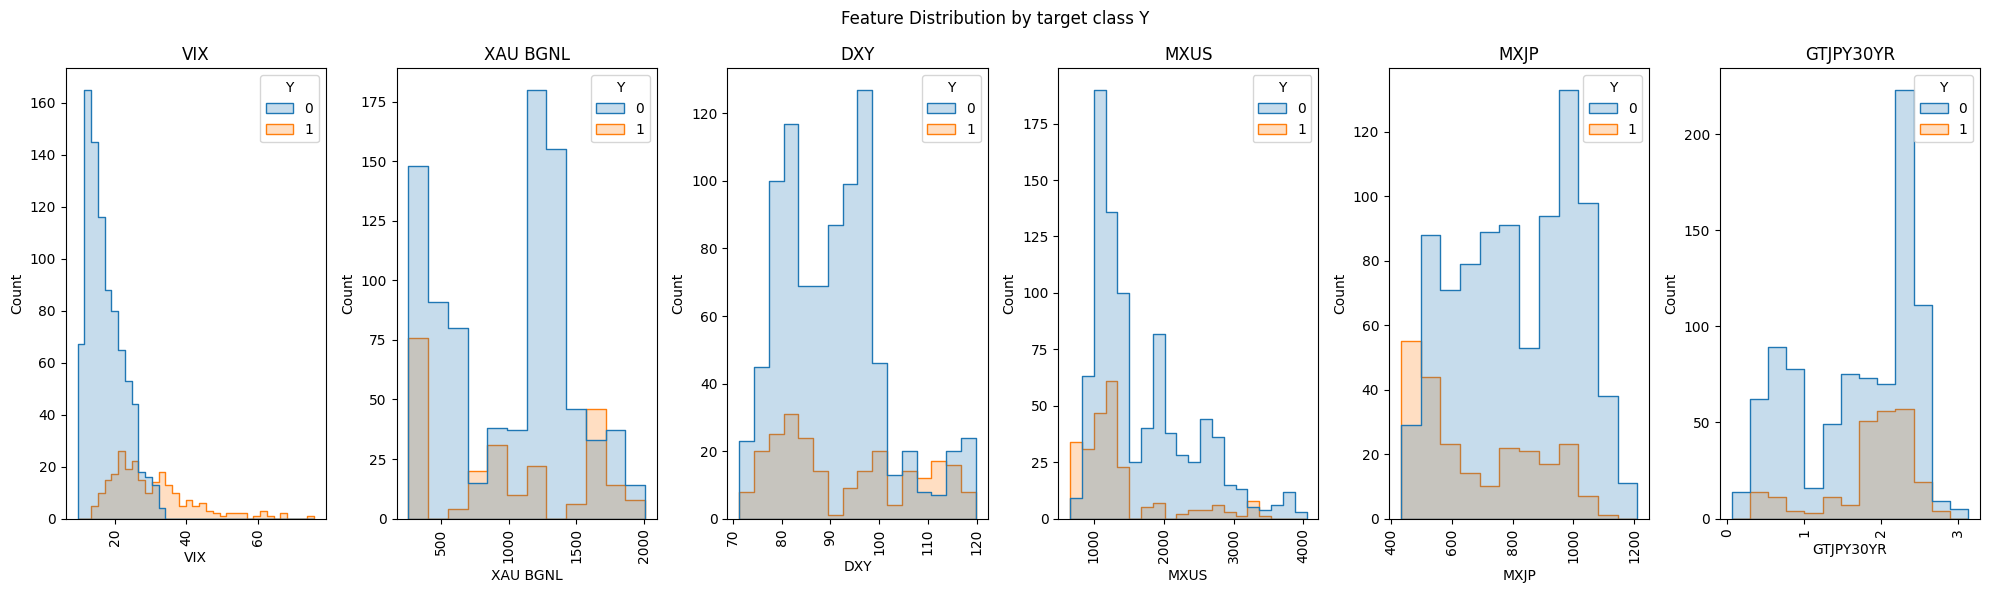

In [9]:
fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 6))
fig.suptitle("Feature Distribution by target class Y")

for i, col in enumerate(cols_to_plot):
    sns.histplot(data=df, x=col, hue='Y', ax=axes[i], element='step')  # element='step' for outline
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [16]:
X = df[["VIX" , "XAU BGNL", "DXY", "MXUS", "MXJP", "GTJPY30YR"]]
Y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LogisticRegression(random_state=42, max_iter = 1000, C = 0.1, class_weight="balanced",solver = "sag")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Classification Report")
print(classification_report(y_test, y_pred))
print(f"Vix Coeeficient: {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       177
           1       0.49      0.80      0.61        46

    accuracy                           0.78       223
   macro avg       0.71      0.79      0.73       223
weighted avg       0.85      0.78      0.80       223

Vix Coeeficient: 0.1393
Intercept: -0.0014


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [18]:
X = df[["VIX" , "XAU BGNL", "DXY", "MXUS", "MXJP", "GTJPY30YR"]]
Y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = IsolationForest(n_estimators=200, contamination="auto", random_state=42,n_jobs = 1)
model.fit(X_train)
y_pred = model.predict(X_test)
print("Classification Report")
print(classification_report(y_test, y_pred))
anomaly_scores = model.score_samples(X_test)
print("\nAnomaly Scores:")
print(f"Mean Score: {np.mean(anomaly_scores )}")
print(f"Min Score: {np.min(anomaly_scores )}")
print(f"Max Score: {np.max(anomaly_scores )}")
#

Classification Report
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00       177
           1       0.13      0.52      0.21        46

    accuracy                           0.11       223
   macro avg       0.04      0.17      0.07       223
weighted avg       0.03      0.11      0.04       223


Anomaly Scores:
Mean Score: -0.4735085800666562
Min Score: -0.6075847663163485
Max Score: -0.4240573321471567


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Decision Tree Classifier Results:
Confusion Matrix:
[[176   1]
 [ 25  21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       177
           1       0.95      0.46      0.62        46

    accuracy                           0.88       223
   macro avg       0.92      0.73      0.77       223
weighted avg       0.89      0.88      0.87       223

Accuracy Score: 0.8834


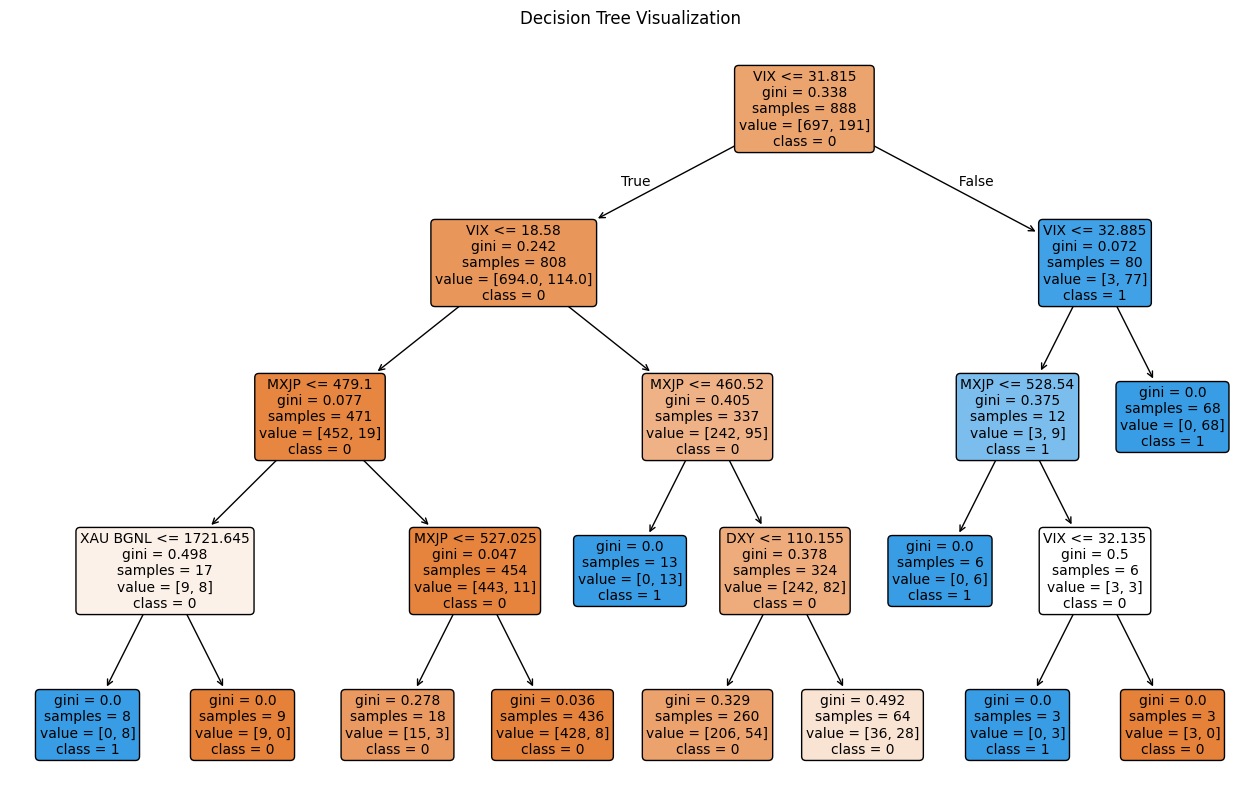

Index(['Y', 'Data', 'XAU BGNL', 'ECSURPUS', 'BDIY', 'CRY', 'DXY', 'JPY', 'GBP',
       'Cl1', 'VIX', 'USGG30YR', 'GT10', 'USGG2YR', 'USGG3M', 'US0001M',
       'GTDEM30Y', 'GTDEM10Y', 'GTDEM2Y', 'EONIA', 'GTITL30YR', 'GTITL10YR',
       'GTITL2YR', 'GTJPY30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTGBP30Y',
       'GTGBP20Y', 'GTGBP2Y', 'LUMSTRUU', 'LMBITR', 'LUACTRUU', 'LF98TRUU',
       'LG30TRUU', 'LP01TREU', 'EMUSTRUU', 'LF94TRUU', 'MXUS', 'MXEU', 'MXJP',
       'MXBR', 'MXRU', 'MXIN', 'MXCN'],
      dtype='object')


In [26]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

# Print Decision Tree Classifier Results
print("Decision Tree Classifier Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")

# Update feature names to match those used in the model
plt.figure(figsize=(16, 10))
plot_tree(
    dt_classifier,
    feature_names=["VIX" , "XAU BGNL", "DXY", "MXUS", "MXJP", "GTJPY30YR"],  # Use correct feature names
    class_names=['0', '1'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

# Check column names used in the original DataFrame
print(df.columns)  # To confirm the feature columns used for training

In [36]:
import xgboost as xgb
X = df[["VIX" , "XAU BGNL", "DXY", "MXUS", "MXJP", "GTJPY30YR"]]
Y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)
xgb_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8789237668161435
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       177
           1       0.74      0.63      0.68        46

    accuracy                           0.88       223
   macro avg       0.83      0.79      0.80       223
weighted avg       0.87      0.88      0.88       223



In [32]:
from openai import OpenAI
import os
from google.colab import userdata
groq_api = userdata.get('GROQ_API_KEY')
client = OpenAI(
    base_url="https://api.groq.com/openai/v1",
    api_key=groq_api
)

In [30]:

query_data = df.head(5)
system_prompt = '''You are an expert financial analyst with machine learning background. You also have knowledge of how to detect anomalies in financial data.
You will explain all column headers and their influence over the financial market.
Explain their contributions to market anomalies.
Out of all columns headers, explain which are the key columns required to train an ML model that can detect market anomalies.
Explain if any columns need to be dropped in order to create an accurate model.
'''
user_query = f"This is the data: {query_data}. variable Y in the dataframe is a binary indicator of a market anomaly or not."

In [33]:
llm_response = client.chat.completions.create(
       model="llama-3.1-8b-instant",
       messages=[
           {"role": "system", "content": system_prompt},
           {"role": "user", "content": user_query}
       ]
   )

print(llm_response.choices[0].message.content)

The provided dataset contains 44 columns, including various economic and financial indicators that can influence the market. Here's a brief explanation of each column, their influence on the financial market, and their potential contribution to market anomalies:

**Exogenous Variables (Predictors):**

1. **Data**: The date, which can be used as a temporal feature to capture seasonal or cyclical patterns in the data.
2. **Y**: A binary indicator of a market anomaly or not. This will be the target variable for our machine learning model.
3. **XAU**: The price of gold, which is often used as a hedge against inflation and market volatility.
4. **BGNL**: The return on the exchange rate of the Bulgarian lev (BGN) against the US dollar (USD).
5. **EC SURPU**: The eurocore surplus of the EU, which can influence EU economies and the overall market.
6. **BDIY**: The Baltic Dry Index (BDI), which measures the cost of shipping raw materials and can indicate changes in global demand and trade.
7. *

In [38]:
system_prompt = '''You are a financial expert specializing in market return strategies.
Your task is to assist in generating profitable and risk-managed trading strategies.

When provided with XGBoost predictions on market data,
you will analyze the predictions and generate a comprehensive market strategy.

The strategy should include:

* **Asset Allocation:** Specific recommendations for allocating capital across different asset classes (e.g., stocks, bonds, commodities).
* **Entry and Exit Points:** Clear buy and sell signals or price levels for entering and exiting trades.
* **Risk Management:** Guidelines for managing risk, such as stop-loss orders, position sizing, and diversification.
* **Time Horizon:** Indication of the intended duration of the strategy (short-term, mid-term, or long-term).
* **Rationale:** Brief explanation of the logic behind the strategy, including factors considered and potential risks.

Your response should be concise, well-structured, and actionable.
Avoid ambiguity and provide specific recommendations.

Always prioritize risk management and capital preservation.
Prioritize safety, and only suggest trades that balance risk and potential rewards.

Assume the XGBoost predictions are accurate and reliable for your analysis.'''

user_query = f"Given the XGBoost predictions: {xgb_pred}, generate a market return strategy."
strategy = client.chat.completions.create(
    model="llama-3.1-8b-instant",  # Replace with your LLM
    messages=[
      {"role": "system", "content": system_prompt},
      {"role": "user", "content": user_query}
    ]
  )
print(strategy.choices[0].message.content)

**Market Return Strategy:**

**Asset Allocation:**
Based on the XGBoost predictions, we recommend allocating the portfolio as follows:

- Stocks (60%): Focus on sectors with predicted growth (1 in the predictions). We identify the recommended stocks as: sector1, sector2, sector8, and sector15
- Commodities (20%): Allocating to commodities with predicted growth (sectors 2, 5, 7, and 11)
- Bonds (10%): Diversify in government and corporate bonds to reduce risk
- Alternatives (10%): Include assets such as real estate investment trusts (REITs) or equity-based ETFs for diversification

**Entry and Exit Points:**

- Buy signals: When the XGBoost predictions are 1, indicating growth, enter the market
- Sell signals: When the XGBoost predictions are 0, indicating a stop, exit the market

**Risk Management:**

- Position Sizing: Divide a maximum of 2% of the portfolio's equity into each trade (sectors with predictions 1)
- Stop-loss Orders: Set stop-loss at -3% from entry price for each trade
-